1. Listado de variables y selección
- ~~Por cada variable explicar en una oración el contenido de dicha variable y definir si será utilizada como variable de entrada, de salida, o no será utilizada.~~
- ~~Para la variable de salida especificar los valores posibles que puede tener.~~
- ~~Por cada variable que no se vaya a utilizar, explicar brevemente el motivo.~~
2. Análisis detallado de un conjunto de variables
- ~~Para la variable de salida, explicar y graficar su distribución. Analizar posibles consecuencias o consideraciones a tener en cuenta.~~
- Realizar un análisis individual de cada variable de entrada que será utilizada. A partir del mismo debería poder conocerse la distribución de los datos, si existen valores raros, su relación con la variable de salida, etc. **WIP**
- ~~Para cada una de las variables de entrada elegidas, explicar si se debería realizar o no alguna transformación para poder utilizarla como entrada de un modelo y por qué.~~
- Analizar si las variables de entrada seleccionadas presentan valores nulos y/o extremos. En caso de encontrar dichas condiciones, indicar qué tratamiento se podría darle a las mismas y por qué.
- Verificar si existen variables altamente correlacionadas linealmente. En dicho caso, explicar por qué considera que esto pasa.
Generar un listado de todas las posibles dudas/preguntas que quisieran realizarle al encargado de proveer los datos.

# Trabajo práctico Machine Learning 

#### Se utilizará este [dataset](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset/) para realizar el trabajo práctico.

1 # Listado de variables y selección

## Variables de entrada

1. **Education**
   - **Descripción**: Nivel de educación del empleado.
   - **Posibles valores**: Bachelors, Masters, PHD.
   - **Uso**: Variable de entrada.
   - **Motivo**: El nivel de educación puede influir en la probabilidad de que un empleado deje la empresa

2. **JoiningYear**
   - **Descripción**: Año en que el empleado se unió a la empresa.
   - **Posibles valores**: 2017, 2013, 2014, 2016, 2015, 2012, 2018
   - **Uso**: Variable de entrada.
   - **Motivo**: El tiempo que un empleado ha estado en la empresa puede afectar su decisión de quedarse o irse.

3. **City**
   - **Descripción**: Ciudad en la que trabaja el empleado.
   - **Posibles valores**: Bangalore, Pune, New Delhi
   - **Uso**: Variable de entrada.
   - **Motivo**: La ubicación geográfica puede tener un impacto en la retención de empleados.

4. **PaymentTier**
   - **Descripción**: Nivel de pago del empleado (1, 2 o 3).
   - **Posibles valores**: 3, 1, 2
   - **Uso**: Variable de entrada.
   - **Motivo**: El nivel de pago puede influir en la satisfacción y retención del empleado.

5. **Age**
   - **Descripción**: Edad del empleado.
   - **Posibles valores**: 34, 28, 38, 27, 24, 22, 23, 37, 32, 39, 29, 30, 36, 31, 25, 26, 40, 35, 33, 41
   - **Uso**: Variable de entrada.
   - **Motivo**: La edad puede ser un factor importante en la decisión de un empleado de dejar la empresa.

6. **Gender**
   - **Descripción**: Género del empleado.
   - **Posibles valores**: Male, Female
   - **Uso**: Variable de entrada.
   - **Motivo**: El género puede influir en las decisiones de carrera y retención.

7. **EverBenched**
   - **Descripción**: Indica si el empleado ha estado alguna vez sin proyectos asignados.
   - **Posibles valores**: No, Yes
   - **Uso**: Variable de entrada.
   - **Motivo**: Estar sin proyectos puede afectar la moral y la decisión de un empleado de dejar la empresa.

8. **ExperienceInCurrentDomain**
   - **Descripción**: Años de experiencia del empleado en su dominio actual.
   - **Posibles valores**: 0, 3, 2, 5, 1, 4, 7, 6
   - **Uso**: Variable de entrada.
   - **Motivo**: La experiencia en el dominio actual puede influir en la estabilidad del empleo.

## Variable Target

9. **LeaveOrNot**
   - **Descripción**: Indica si el empleado ha dejado la empresa (1) o no (0).
   - **Posibles valores**: 0, 1
   - **Uso**: Variable de salida.
   - **Motivo**: Esta es la variable objetivo que estamos tratando de predecir. Los valores posibles son 0 (No dejó la empresa) y 1 (Dejó la empresa).

## Variables no utilizadas

No hay variables que no se vayan a utilizar, ya que todas parecen relevantes para el análisis de la retención de empleados.


# 2.  Análisis detallado de un conjunto de variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Cargar el conjunto de datos
df_employee = pd.read_csv('employee.csv')

# Crear una función para convertir a snake case
def to_snake_case(name):
    # Reemplaza espacios y caracteres especiales por guiones bajos
    name = re.sub(r'(?<!^)(?<!_)(?<!\s)(?<![A-Z])(?=[A-Z])', '_', name)
    # Convierte a minúsculas y reemplaza múltiples guiones bajos consecutivos por uno solo
    name = re.sub(r'_{2,}', '_', name)
    return name.lower()

# Renombrar columnas a snake case
df_employee.columns = [to_snake_case(col) for col in df_employee.columns]

# Mostrar las primeras filas del DataFrame para verificar los cambios
df_employee.head()


,education,joining_year,city,payment_tier,age,gender,ever_benched,experience_in_current_domain,leave_or_not
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


## Análisis previo

In [3]:
print(f'El dataset cuenta con {df_employee.shape[0]} filas y {df_employee.shape[1]} columnas.')

El dataset cuenta con 4653 filas y 9 columnas.


### Valores únicos por feature

In [4]:
# Obtener valores únicos por columna
valores_unicos = {col: df_employee[col].unique() for col in df_employee.columns}

for columna, valores in valores_unicos.items():
    print(f"{columna}: {valores}")

education: ['Bachelors' 'Masters' 'PHD']
joining_year: [2017 2013 2014 2016 2015 2012 2018]
city: ['Bangalore' 'Pune' 'New Delhi']
payment_tier: [3 1 2]
age: [34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]
gender: ['Male' 'Female']
ever_benched: ['No' 'Yes']
experience_in_current_domain: [0 3 2 5 1 4 7 6]
leave_or_not: [0 1]


### Tipos de datos de cada feature

In [5]:
print(df_employee.dtypes.reset_index(name='type').rename(columns={'index': 'column'}).set_index('column'))


                                type
column                              
education                     object
joining_year                   int64
city                          object
payment_tier                   int64
age                            int64
gender                        object
ever_benched                  object
experience_in_current_domain   int64
leave_or_not                   int64


### Cantidad de nulos por feature

In [6]:
# Verificar la cantidad de valores nulos en cada columna
df_employee.isnull().sum()

education                       0
joining_year                    0
city                            0
payment_tier                    0
age                             0
gender                          0
ever_benched                    0
experience_in_current_domain    0
leave_or_not                    0
dtype: int64

### Estadísticos generales

In [7]:
df_employee.describe().round(2)

,joining_year,payment_tier,age,experience_in_current_domain,leave_or_not
count,4653.00,4653.00,4653.00,4653.00,4653.00
mean,2015.06,2.70,29.39,2.91,0.34
std,1.86,0.56,4.83,1.56,0.48
min,2012.00,1.00,22.00,0.00,0.00
25%,2013.00,3.00,26.00,2.00,0.00
50%,2015.00,3.00,28.00,3.00,0.00
75%,2017.00,3.00,32.00,4.00,1.00
max,2018.00,3.00,41.00,7.00,1.00


### 1. Tendencias de Contratación (`joining_year`)
La mayoría de los empleados se unieron entre 2013 y 2017, con una media de 2015, indicando que la empresa ha tenido una política de contratación activa durante este período, lo que sugiere que la antigüedad en la empresa podría ser una característica importante a considerar en un modelo predictivo sobre la rotación de empleados.

### 2. Niveles de Pago (`payment_tier`)
La mayoría de los empleados están en el nivel 3 de pago, con una media de 2.70 y una desviación estándar baja (0.56), lo que sugiere que el nivel de pago podría estar correlacionado con la retención y la experiencia, y que explorar cómo estos niveles afectan la rotación de empleados podría ser útil.

### 3. Edad (`age`)
La edad promedio es de 29.39 años, con un rango de 22 a 41 años y la mayoría de los empleados tienen entre 26 y 32 años, y podemos inferir que la edad puede influir en la experiencia y la estabilidad en el trabajo.

### 4. Experiencia en el Dominio Actual (`experience_in_current_domain`)
La experiencia promedio en el dominio actual es de 2.91 años, con un rango de 0 a 7 años y la mayoría de los empleados tienen entre 2 y 4 años de experiencia.

### 5. Rotación de Empleados (`leave_or_not`)
Aproximadamente el 34% de los empleados han dejado la empresa, con una distribución equilibrada entre los que se quedan y los que se van.


In [8]:
# Calcular la distribución de la variable de salida
leaveornot_distribution = df_employee['leave_or_not'].value_counts(normalize=True)
print(leaveornot_distribution)

leave_or_not
0    0.656136
1    0.343864
Name: proportion, dtype: float64


### Conclusiones 

- El 65.6% de los empleados del dataset no han dejado la empresa, mientras que 34.4% de los empleados han dejado la empresa.

- Aunque no es un equilibrio perfecto, la distribución entre los que se quedan y los que se van no está extremadamente desbalanceada. Sin embargo, aún hay una diferencia notable, con una mayoría que se queda.

- La retención de empleados parece ser relativamente alta, con más de la mitad de los empleados permaneciendo en la empresa. Esto podría indicar una buena satisfacción laboral o políticas efectivas de retención.

### Para la variable de salida, explicar y graficar su distribución. Analizar posibles consecuencias o consideraciones a tener en cuenta.

1. Descripción de la Variable de Salida
La variable de salida leave_or_not es binaria y representa si un empleado ha dejado la empresa (1) o no (0). Analizar su distribución te ayudará a entender el equilibrio entre las clases y las posibles implicaciones para el modelado.



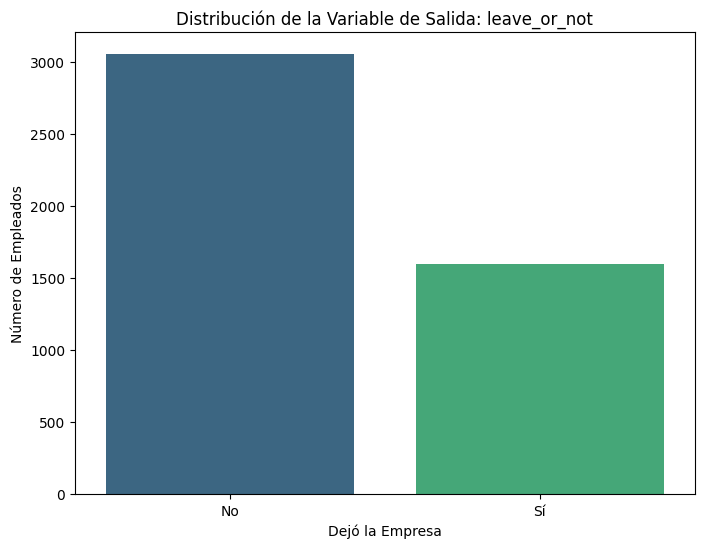

In [9]:
# Graficar la distribución de `leave_or_not`
plt.figure(figsize=(8, 6))
sns.countplot(x='leave_or_not', data=df_employee, hue='leave_or_not', palette='viridis', legend=False)
plt.title('Distribución de la Variable de Salida: leave_or_not')
plt.xlabel('Dejó la Empresa')
plt.ylabel('Número de Empleados')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()


# Preprocesamiento de datos

### Feature gender

Es necesario realizar la comprobación y conversión de la columna *gender* a valor numerico por varias razones:

Si bien como vimos anteriormente no tenemos datos nulls en esta columna. Los modelos de machine learning generalmente requieren que las variables categóricas sean numéricas, y convertir Male a 1 y Female a 0 estandariza esta variable. Además, las conversiones a valores numéricos permiten que los datos sean procesados de manera más eficiente.

In [10]:
# Comprobación y conversión de la columna `gender`
df_employee['gender'] = df_employee['gender'].apply(lambda x: 1 if x == 'Male' else (0 if x == 'Female' else x))

# Si el valor es 'Male', lo convierte en 1.
# Si el valor es 'Female', lo convierte en 0.
    
# Obtener una muestra aleatoria del DataFrame
df_employee.sample(5)


,education,joining_year,city,payment_tier,age,gender,ever_benched,experience_in_current_domain,leave_or_not
2333,Bachelors,2015,Bangalore,3,29,1,No,2,0
1546,Bachelors,2018,Pune,3,24,1,Yes,2,1
2267,Masters,2012,Pune,3,30,1,No,1,0
4529,Bachelors,2015,Pune,3,36,1,No,3,0
2368,Bachelors,2017,New Delhi,2,28,0,No,1,0


### Feature ever_benched

Convertir los valores de ever_benched a booleanos (True o False) asegura que la columna tenga un tipo de datos consistente. 

- Claridad: Los valores booleanos proporcionan una indicación clara del estado de "benched".
- Eficiencia: Las operaciones y análisis sobre datos booleanos pueden ser más eficientes y directos.
- Estandarización: Mantiene la columna ever_benched en un formato estandarizado que es comúnmente utilizado en el análisis de datos y machine learning.

In [11]:
# Comprobación y conversión de la columna `ever_benched`
df_employee['ever_benched'] = df_employee['ever_benched'].apply(lambda x: True if x == 1 else (False if x == 0 else x))

# Obtener una muestra aleatoria del DataFrame
df_employee.sample(5)

,education,joining_year,city,payment_tier,age,gender,ever_benched,experience_in_current_domain,leave_or_not
3013,Bachelors,2016,Bangalore,3,32,1,No,1,0
4462,Bachelors,2016,Pune,2,35,0,No,4,1
2563,Bachelors,2017,Bangalore,3,30,1,No,1,1
610,Bachelors,2017,Pune,3,27,0,No,5,1
1094,Bachelors,2015,Pune,2,27,0,No,5,1


### Feature education y city

Es necesario realizar la codificación One-Hot en las columnas *education* y *city* por las siguientes razones:
- No suposiciones implícitas: Al usar columnas binarias, se evita cualquier suposición sobre una relación ordinal entre las categorías.
- Preparación para modelos: Facilita el uso de algoritmos de machine learning que requieren datos numéricos.
- Claridad y simplicidad: Hace que las features education y city sean más claras y fáciles de interpretar en el análisis de datos.
- Flexibilidad: Permite a los modelos captar mejor las relaciones entre las categorías y otras características.

Realizar la codificación One-Hot es una práctica estándar en el preprocesamiento de datos para asegurar que los modelos de machine learning puedan trabajar de manera eficiente.

In [12]:
# Codificación One-Hot
df_employee = pd.get_dummies(df_employee, columns=['education'])
df_employee = pd.get_dummies(df_employee, columns=['city'])

# Renombrar columnas a snake case
df_employee.columns = [to_snake_case(col) for col in df_employee.columns]

# Obtener una muestra aleatoria del DataFrame
df_employee.sample(5)

,joining_year,payment_tier,age,gender,ever_benched,experience_in_current_domain,leave_or_not,education_bachelors,education_masters,education_phd,city_bangalore,city_new delhi,city_pune
2459,2014,3,30,1,Yes,2,0,False,True,False,False,True,False
1521,2016,3,27,0,No,5,0,False,False,True,False,True,False
2796,2018,2,30,0,No,4,1,False,False,True,False,True,False
3544,2014,3,37,1,No,4,0,True,False,False,True,False,False
2226,2017,3,26,1,No,4,1,False,True,False,False,True,False


## Análisis individual de cada variable de entrada que será utilizada

 ### Año de Ingreso (joining_year)

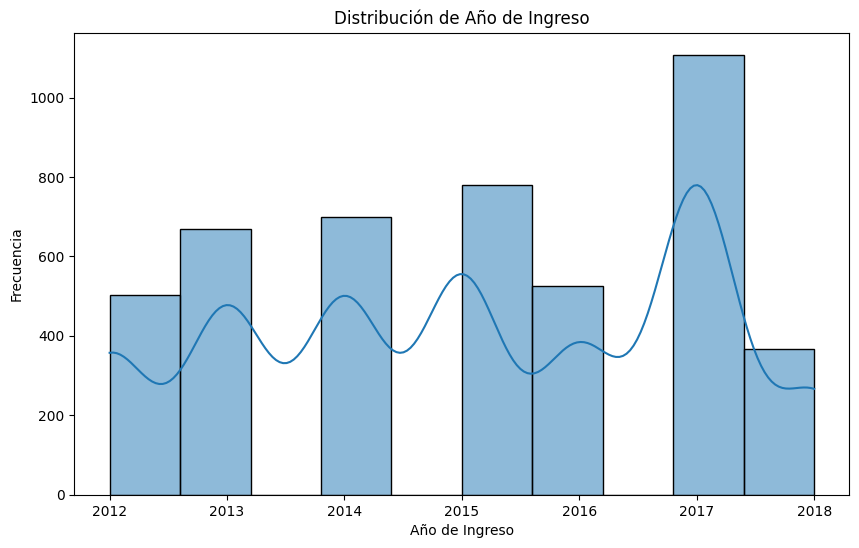

In [14]:
# Distribución de la variable joining_year
plt.figure(figsize=(10, 6))
sns.histplot(df_employee['joining_year'], bins=10, kde=True)
plt.title('Distribución de Año de Ingreso')
plt.xlabel('Año de Ingreso')
plt.ylabel('Frecuencia')
plt.show()

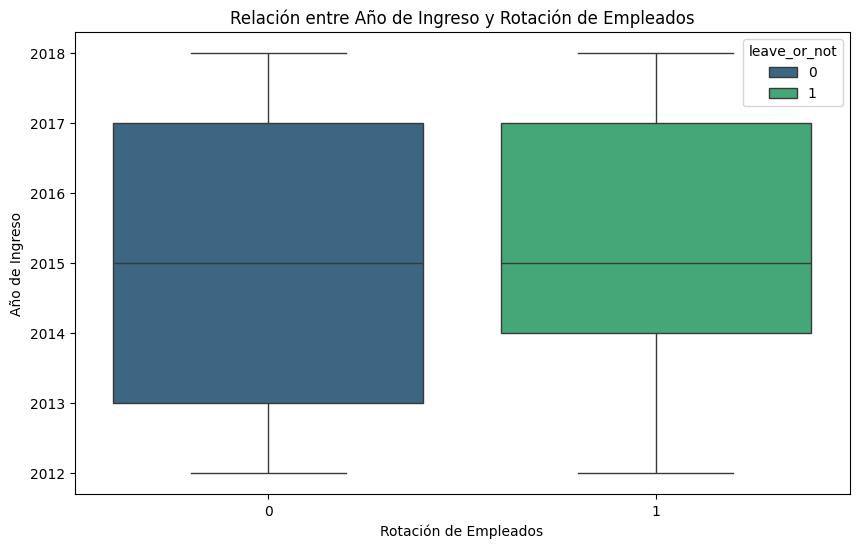

In [15]:
# Relación entre joining_year y leave_or_not
plt.figure(figsize=(10, 6))
sns.boxplot(x='leave_or_not', hue='leave_or_not', y='joining_year', data=df_employee, palette='viridis')
plt.title('Relación entre Año de Ingreso y Rotación de Empleados')
plt.xlabel('Rotación de Empleados')
plt.ylabel('Año de Ingreso')
plt.show()

Conclusiones:

- La mayoría de los empleados se unieron entre 2013 y 2017.
- La antigüedad en la empresa puede ser un factor importante a considerar en la predicción de la rotación.

## Nivel de Pago (payment_tier)

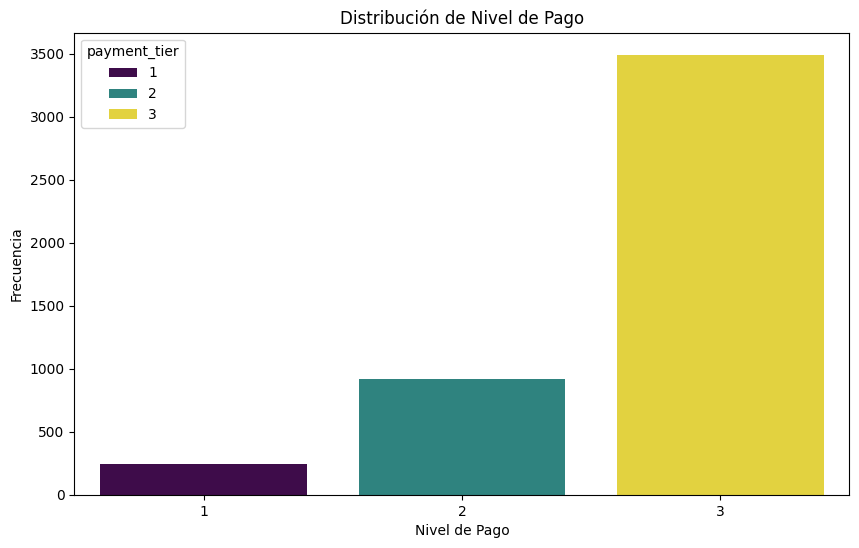

In [16]:
# Distribución de la variable payment_tier
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_tier', hue= 'payment_tier', data=df_employee, palette='viridis')
plt.title('Distribución de Nivel de Pago')
plt.xlabel('Nivel de Pago')
plt.ylabel('Frecuencia')
plt.show()

Conclusiones:

- La mayoría de los empleados están en el nivel 3 de pago.
- Puede existir una relación entre el nivel de pago y la probabilidad de rotación.

 ## Edad (age)

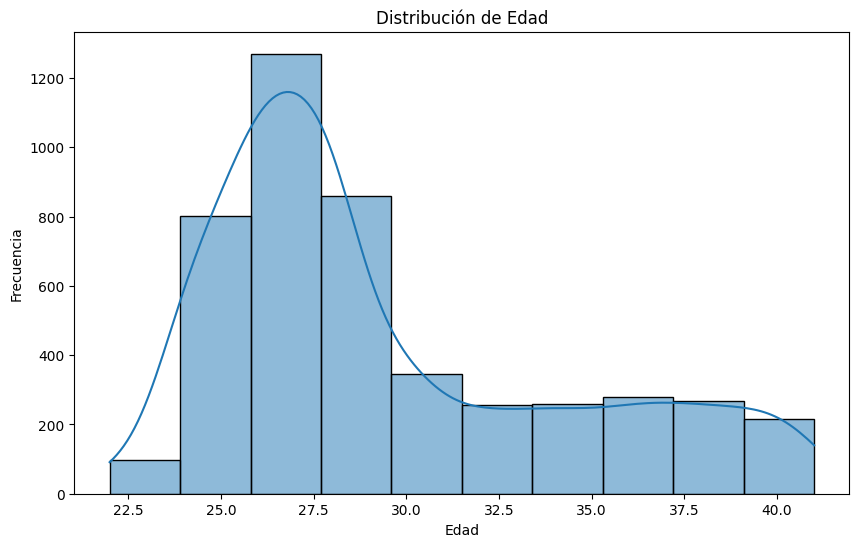

In [17]:
# Distribución de la variable age
plt.figure(figsize=(10, 6))
sns.histplot(df_employee['age'], bins=10, kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

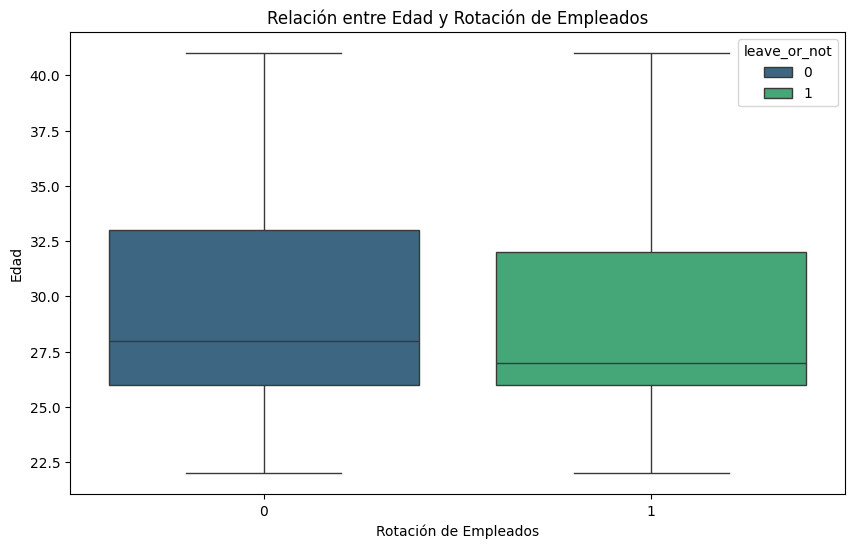

In [30]:
# Relación entre age y leave_or_not
plt.figure(figsize=(10, 6))
sns.boxplot(x='leave_or_not', hue='leave_or_not', y='age', data=df_employee, palette='viridis')
plt.title('Relación entre Edad y Rotación de Empleados')
plt.xlabel('Rotación de Empleados')
plt.ylabel('Edad')
plt.show()

Conclusiones:

- La edad promedio de los empleados es de alrededor de 29 años.
- La edad puede ser un factor determinante en la estabilidad laboral.

## Género (gender)

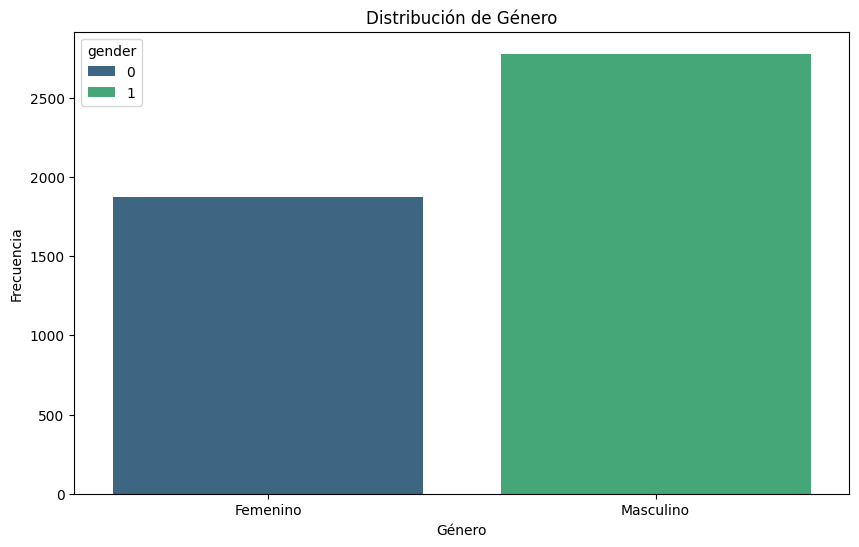

In [31]:
# Distribución de la variable gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue= 'gender', data=df_employee, palette='viridis')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['Femenino', 'Masculino'])
plt.show()

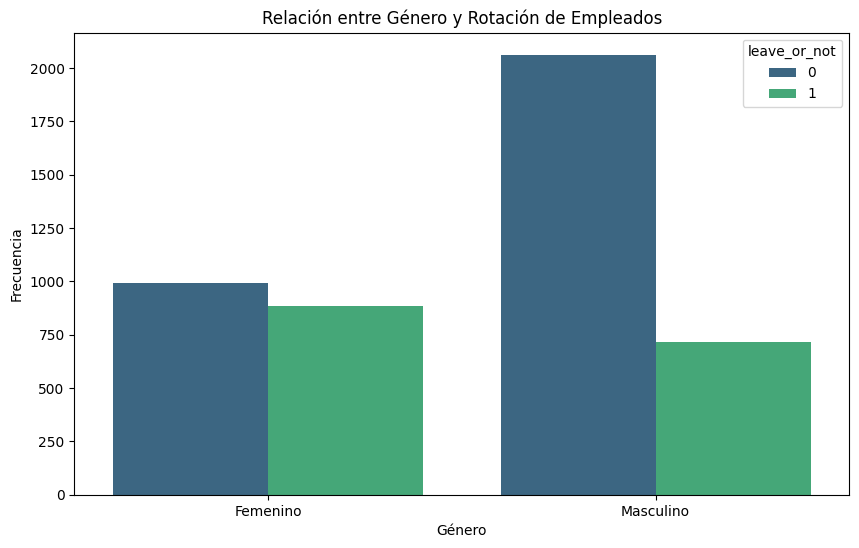

In [32]:
# Relación entre gender y leave_or_not
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='leave_or_not', data=df_employee, palette='viridis')
plt.title('Relación entre Género y Rotación de Empleados')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['Femenino', 'Masculino'])
plt.show()

Conclusiones:

- Existe una distribución relativamente equilibrada entre géneros.
- Puede ser útil investigar si el género tiene una influencia significativa en la rotación.

## Experiencia en el Dominio Actual (experience_in_current_domain)

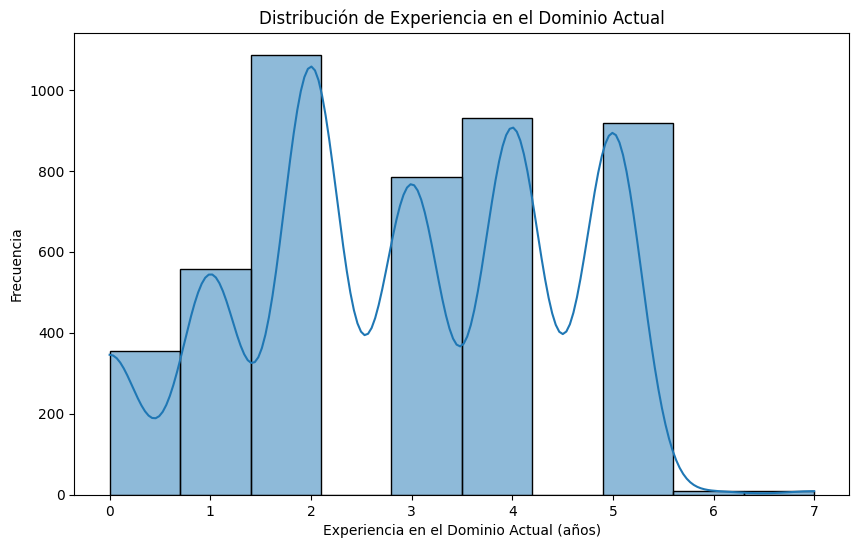

In [21]:
# Distribución de la variable experience_in_current_domain
plt.figure(figsize=(10, 6))
sns.histplot(df_employee['experience_in_current_domain'], bins=10, kde=True)
plt.title('Distribución de Experiencia en el Dominio Actual')
plt.xlabel('Experiencia en el Dominio Actual (años)')
plt.ylabel('Frecuencia')
plt.show()

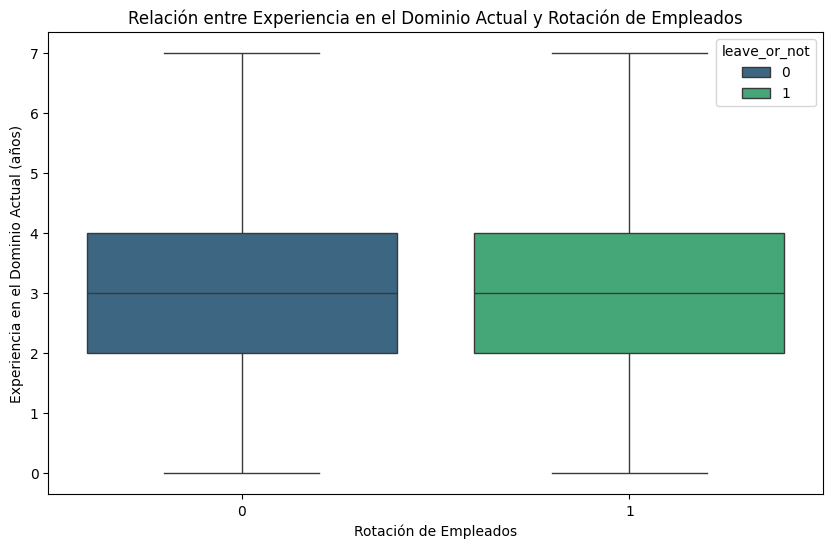

In [22]:
# Relación entre experience_in_current_domain y leave_or_not
plt.figure(figsize=(10, 6))
sns.boxplot(x='leave_or_not', hue='leave_or_not', y='experience_in_current_domain', data=df_employee, palette='viridis')
plt.title('Relación entre Experiencia en el Dominio Actual y Rotación de Empleados')
plt.xlabel('Rotación de Empleados')
plt.ylabel('Experiencia en el Dominio Actual (años)')
plt.show()

Conclusiones:

- La mayoría de los empleados tienen entre 2 y 4 años de experiencia en su dominio actual.
- La experiencia en el dominio puede estar correlacionada con la retención de empleados.

## ever_benched

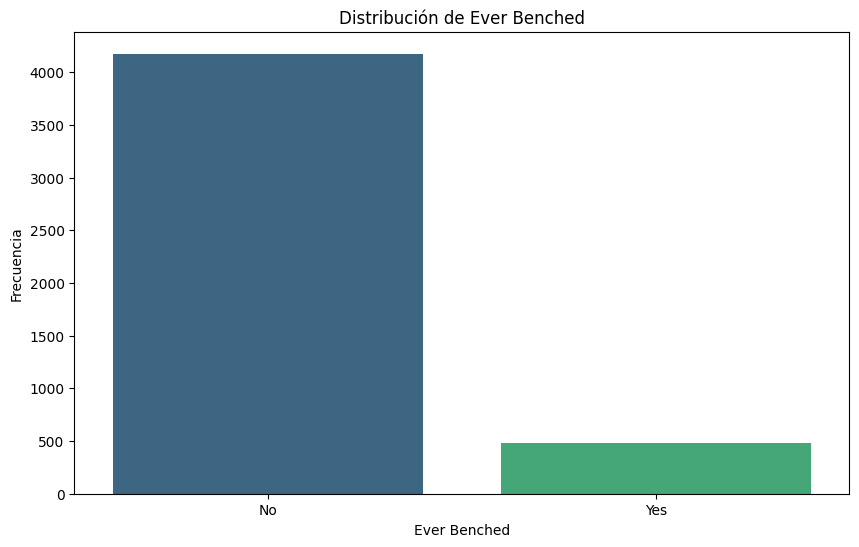

In [33]:
# Distribución de la variable ever_benched
plt.figure(figsize=(10, 6))
sns.countplot(x='ever_benched', hue= 'ever_benched', data=df_employee, palette='viridis')
plt.title('Distribución de Ever Benched')
plt.xlabel('Ever Benched')
plt.ylabel('Frecuencia')
plt.xticks([False, True], ['No', 'Yes'])
plt.show()

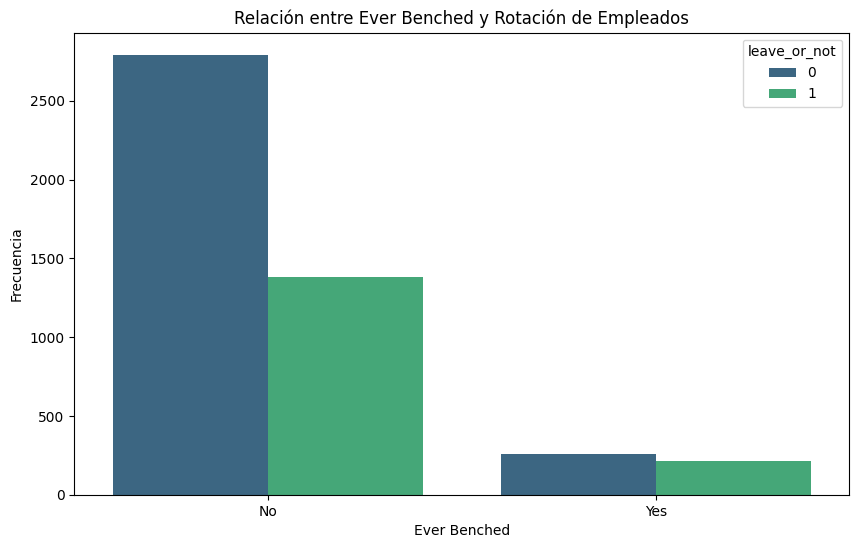

In [34]:
# Relación entre ever_benched y leave_or_not
plt.figure(figsize=(10, 6))
sns.countplot(x='ever_benched', hue='leave_or_not', data=df_employee, palette='viridis')
plt.title('Relación entre Ever Benched y Rotación de Empleados')
plt.xlabel('Ever Benched')
plt.ylabel('Frecuencia')
plt.xticks([False, True], ['No', 'Yes'])
plt.show()

Conclusiones:

- La mayoría de los empleados no han sido 'benched'.
- Ser 'benched' podría tener un impacto significativo en la rotación de empleados.

## Educación (education)

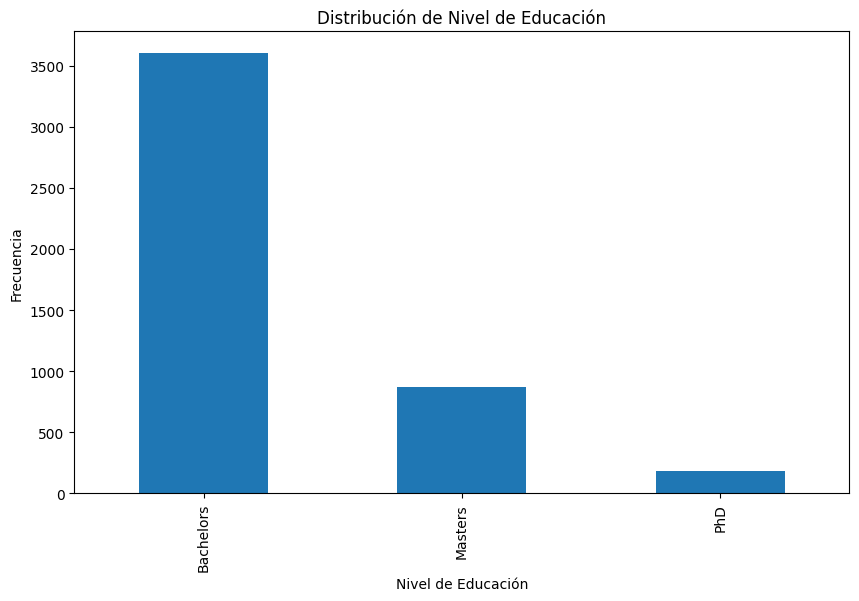

In [25]:
# Distribución de la variable education
plt.figure(figsize=(10, 6))
education_counts = df_employee[['education_bachelors', 'education_masters', 'education_phd']].sum()
education_counts.plot(kind='bar')
plt.title('Distribución de Nivel de Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Frecuencia')
plt.xticks([0, 1, 2], ['Bachelors', 'Masters', 'PhD'])
plt.show()

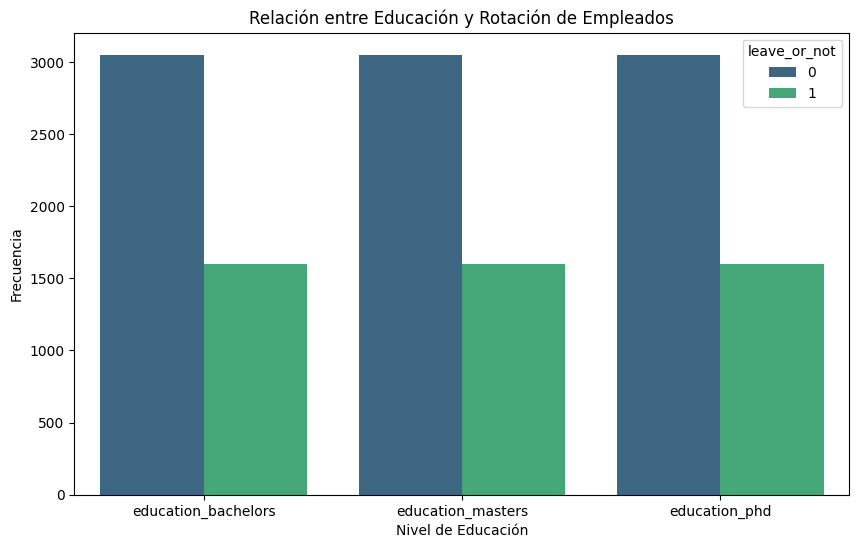

In [35]:
# Relación entre education y leave_or_not
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='leave_or_not', data=df_employee.melt(id_vars='leave_or_not', value_vars=['education_bachelors', 'education_masters', 'education_phd'], var_name='education', value_name='value'), palette='viridis')
plt.title('Relación entre Educación y Rotación de Empleados')
plt.xlabel('Nivel de Educación')
plt.ylabel('Frecuencia')
plt.show()

Conclusiones:

- La mayoría de los empleados tienen un título de bachiller o una maestría.
- Es importante analizar si el nivel educativo afecta la rotación de empleados.

## Ciudad (city)

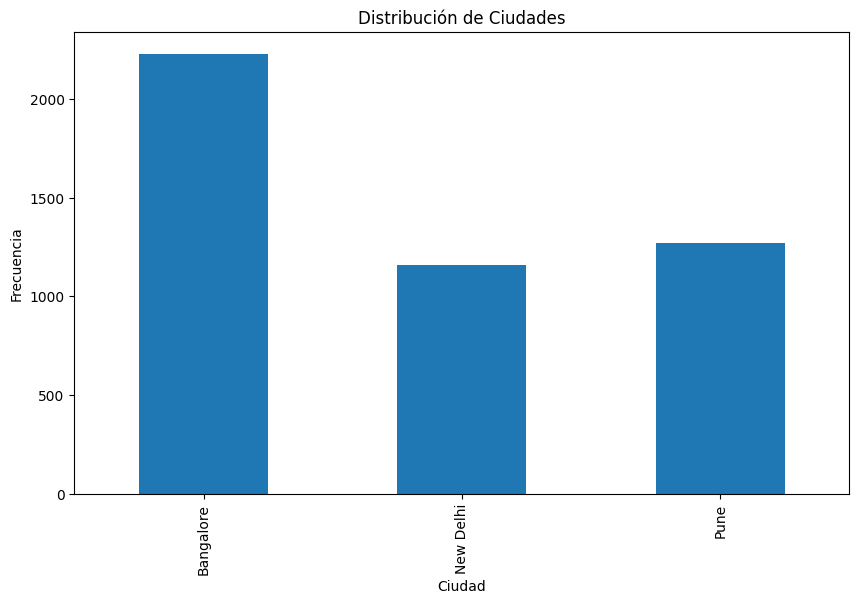

In [36]:
# Distribución de la variable city
plt.figure(figsize=(10, 6))
city_counts = df_employee[['city_bangalore', 'city_new delhi', 'city_pune']].sum()
city_counts.plot(kind='bar')
plt.title('Distribución de Ciudades')
plt.xlabel('Ciudad')
plt.ylabel('Frecuencia')
plt.xticks([0, 1, 2], ['Bangalore', 'New Delhi', 'Pune'])
plt.show()

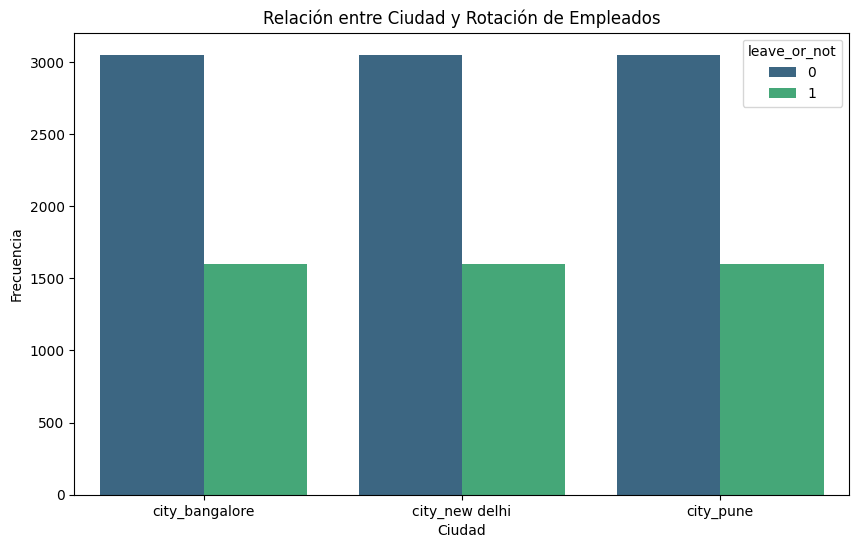

In [37]:
# Relación entre city y leave_or_not
plt.figure(figsize=(10, 6))
sns.countplot(x='city', hue='leave_or_not', data=df_employee.melt(id_vars='leave_or_not', value_vars=['city_bangalore', 'city_new delhi', 'city_pune'], var_name='city', value_name='value'), palette='viridis')
plt.title('Relación entre Ciudad y Rotación de Empleados')
plt.xlabel('Ciudad')
plt.ylabel('Frecuencia')
plt.show()

Conclusiones:

- La distribución de empleados es bastante uniforme entre las ciudades principales.